<a href="https://colab.research.google.com/github/atharvapatil123/ML_Practice/blob/master/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apriori

# **Association Rule Learning**

People who bought/watched/.. also bought...

Apriori has 3 parts:

1. Support

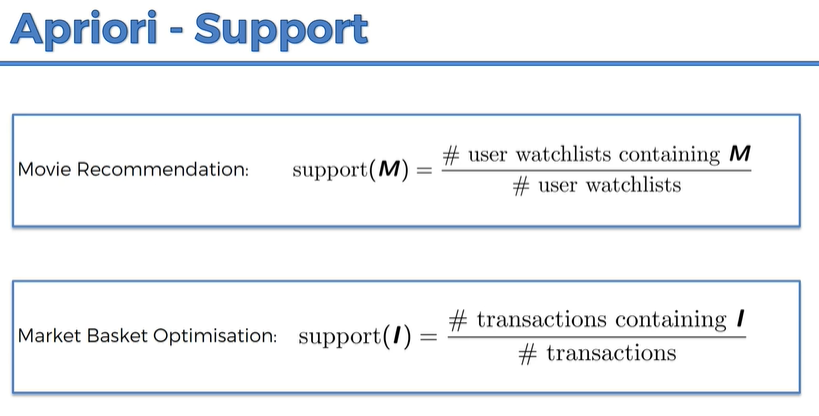

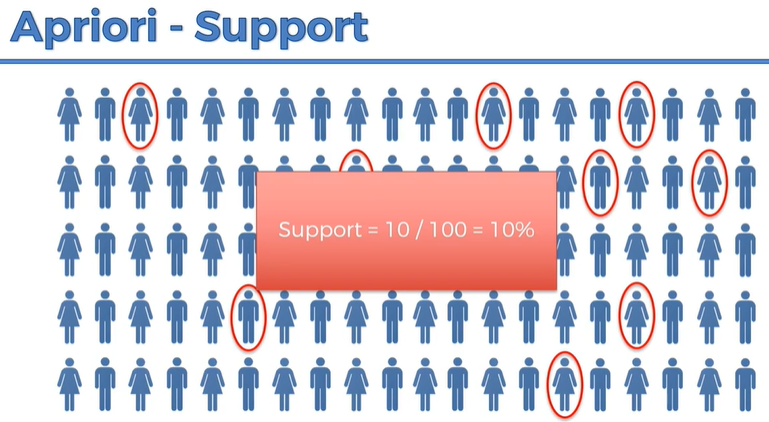



2. Confidence 

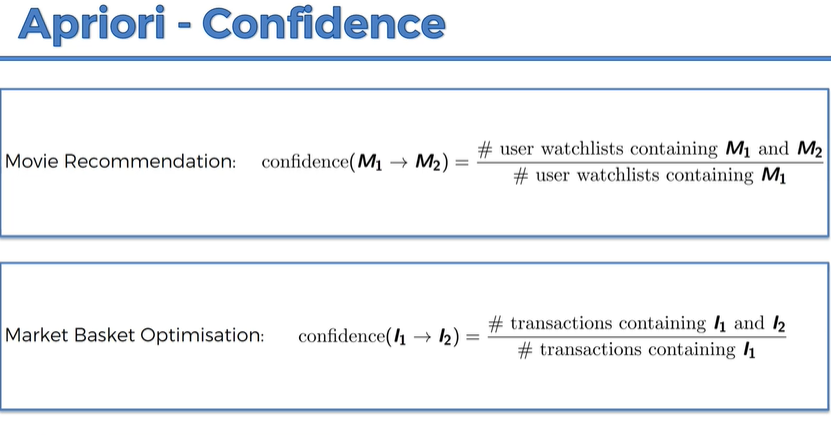

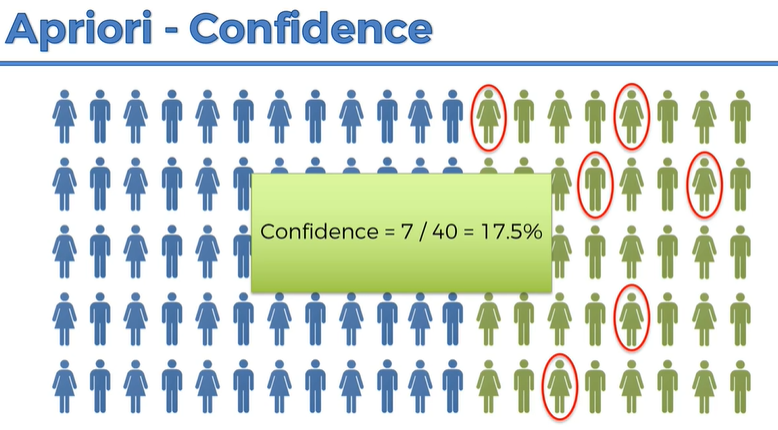

3. Lift

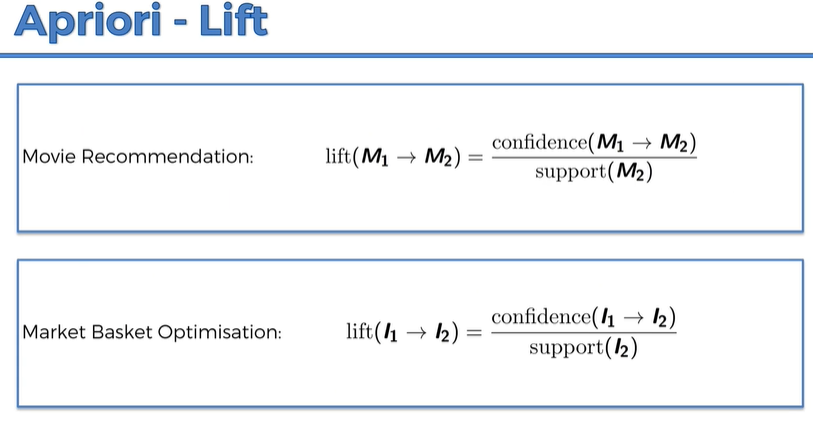

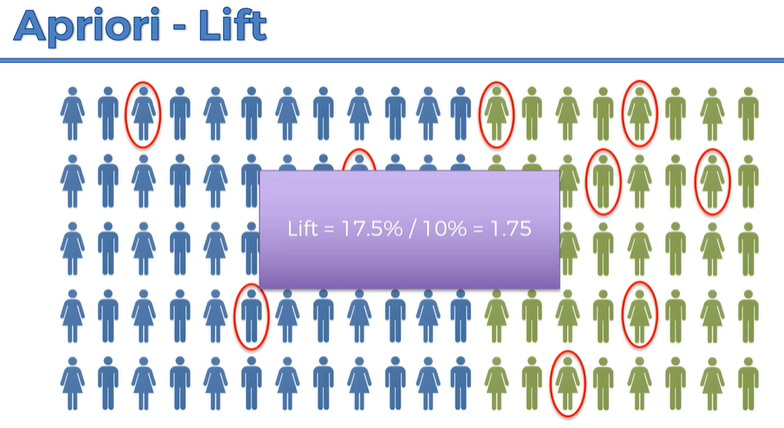

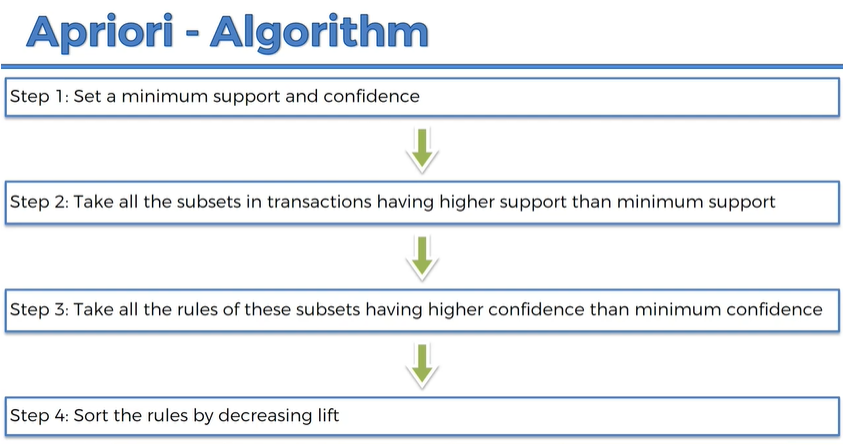

apyori is not present in google colab, so need to install it

In [22]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=4bbedbb359fb93f4a2b82ade0459caae551be4842af4fea49887d4d99b4307cd
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [21]:
# As names of columns (headers) are absent in dataset, headers = None
dataset = pd.read_csv("Market_Basket_Optimisation.csv", header = None)
transactions = []
for i in range(len(dataset)):
  transactions.append([str(dataset.values[i, j]) for j in range(0, 20)])
print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

## Training the Apriori model on the dataset

In [41]:
from apyori import apriori
# Returns rules
rules = apriori(transactions = transactions,  min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)
# min_support: Assuming 3 transactions / day or 21 / week => 21/7501 = 0.003
# min_confidence: Experimentally
# min_lift: 3, 4, 5 etc
# min_lenght, max_length: Business model -> Buy A, get B free
print(rules)

<generator object apriori at 0x7f3473eacf50>


## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [42]:
results = list(rules)

In [43]:
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Putting the results well organised into a Pandas DataFrame

In [44]:
def inspect(results):
  lhs = [tuple(result[2][0][0])[0] for result in results] 
  rhs = [tuple(result[2][0][1])[0] for result in results] 
  supports = [result[1] for result in results] 
  confidences = [result[2][0][2] for result in results] 
  lifts = [result[2][0][3] for result in results]
  return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift']) 
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### **Takeaways**

1. Support gives us the ocuurence of A & B in the entire dataset

2. Confidence gives us the occurence of B, when A has already occured, from the A's dataset

3. Higher the lift, higher is the chance of occurence of B with A, rather than occuring without A. That is, more occurences of B are present in A's subset.

### Displaying the results sorted w.r.t lifts

In [45]:
print(resultsinDataFrame.nlargest(n = 43, columns = 'Lift'))

         Left Hand Side Right Hand Side   Support  Confidence      Lift
3         fromage blanc           honey  0.003333    0.245098  5.164271
0           light cream         chicken  0.004533    0.290598  4.843951
2                 pasta        escalope  0.005866    0.372881  4.700812
8                 pasta          shrimp  0.005066    0.322034  4.506672
7     whole wheat pasta       olive oil  0.007999    0.271493  4.122410
5          tomato sauce     ground beef  0.005333    0.377358  3.840659
1  mushroom cream sauce        escalope  0.005733    0.300699  3.790833
4         herb & pepper     ground beef  0.015998    0.323450  3.291994
6           light cream       olive oil  0.003200    0.205128  3.114710
